# Sprawozdanie 5

Katarzyna Nyznar

In [1]:
from math import *
from numpy import *
from numpy.linalg import inv
from scipy.linalg import *
import time
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.sparse.linalg import bicg, gmres
from scipy.sparse import csr_matrix

ZADANIE 1

In [2]:
A = array([[1, 1], [1, 1.0001]])
b1 = array([[2], [2.0001]])
b2 = array([[2], [2]])

x1 = solve(A, b1)
print("Rozwiązanie dla b1:")
print(x1)
x2 = solve(A,b2)
print("\nRozwiązanie dla b2:")
print(x2)
wsp_uwarunkowania = linalg.cond(A)
print("\nWspółczynnik uwarunkowania macierzy A: ", wsp_uwarunkowania)

Rozwiązanie dla b1:
[[ 1.]
 [ 1.]]

Rozwiązanie dla b2:
[[ 2.]
 [ 0.]]

Współczynnik uwarunkowania macierzy A:  40002.0000749


ZADANIE 2

In [4]:
H = hilbert(8)

wsk_kolumnowa = LA.cond(H, inf)
wsk_spektralna = LA.cond(H, 2)
wsk_wierszowa = LA.cond(H, 1)

print("Współczynniki uwarunkowania macierzy: ")
print("Dla normy kolumnowej:", wsk_kolumnowa,2)
print("Dla normy spektralnej:", wsk_spektralna,2)
print("Dla normy wierszowej:", wsk_wierszowa,2)

# Macierz Hilberta jest źle uwarunkowana

Współczynniki uwarunkowania macierzy: 
Dla normy kolumnowej: 33872789109.8 2
Dla normy spektralnej: 15257574847.2 2
Dla normy wierszowej: 33872789110.1 2


ZADANIE 3

In [17]:
n = 20
t = linspace(0, 1, n)
t = transpose(t)
b = [cos(4*t[i]) for i in range(t.size)]
b = transpose(b)

A = fliplr(vander(t))

#Ax=b
start = time.time()
for i in range(100):
    X1 = solve(A, b)
end1 = time.time() - start

Q, R = qr(A)
p = Q.T@b

start = time.time()
for i in range(100):
    X2 = solve_triangular(R, p)
end2 = time.time() - start

start = time.time()
for i in range(100):
    X3 = lstsq(A, b)[0]
end3 = time.time() - start

# Dla lepszego pomiaru czasu, każda funkcja wywoływana jest 100 razy
print("Wynik uzyskany z pomocą metody solve:\n", X1, "\nCzas wykonania: ", end1)
print("\nWynik uzyskany z pomocą rozkładu QR:\n",X2, "\nCzas wykonania: ", end2)
print("\nWynik uzyskany z pomocą metody lstsq\n", X3, "\nCzas wykonania: ", end3)


res = b - A@X1
print("\n\nresiduum X1: ", norm(res))
res = b - A@X2
print("residuum X2: ", norm(res))
res = b - A@X3
print("residuum X3: ", norm(res))

Wynik uzyskany z pomocą metody solve:
 [  1.00000000e+00  -1.78396625e-12  -8.00000000e+00  -3.14772547e-09
   1.06666667e+01  -5.38482990e-07  -5.68888485e+00  -2.22345318e-05
   1.62548899e+00  -2.91926133e-04  -2.88247481e-01  -1.33871820e-03
   3.69563353e-02  -2.10907863e-03  -1.37649560e-03  -9.72043640e-04
   5.64051328e-04  -6.61944243e-05  -1.36330098e-05   3.48116567e-06] 
Czas wykonania:  0.008972644805908203

Wynik uzyskany z pomocą rozkładu QR:
 [  1.00000000e+00  -2.25281452e-11  -8.00000000e+00  -4.11781634e-08
   1.06666673e+01  -7.35490279e-06  -5.68883224e+00  -3.22423197e-04
   1.62679020e+00  -4.65437320e-03  -2.76811009e-01  -2.49063725e-02
   7.51347331e-02  -5.04638639e-02   4.59385722e-02  -3.60053877e-02
   1.95283041e-02  -7.14171131e-03   1.61166599e-03  -1.69668477e-04] 
Czas wykonania:  0.003987789154052734

Wynik uzyskany z pomocą metody lstsq
 [  1.00000000e+00   1.65414349e-11  -8.00000000e+00   2.78199653e-08
   1.06666662e+01   4.37567271e-06  -5.68891

C:\Users\katarzyna.nyznar\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.333223014123033e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


ZADANIE 4

[4753.9393453376733, 55200.448746378112, 3788.2636683478036, 21357.026747554693, 1904.3474073953778, 1956.3474617767222]


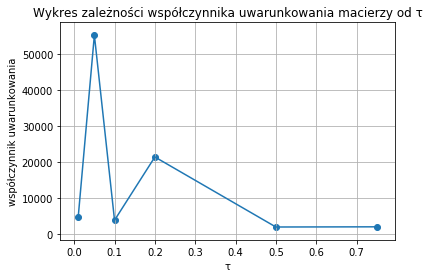

In [18]:
def generateMatrix(n, tau):
    A = ones((n, n))
    for i in range(1, n):
        for j in range(i):
            x = random.uniform(-1, 1)
            A[i][j] = 0 if x > tau else x
            A[j][i] = A[i][j]
    return A


b = [random.uniform(-1, 1) for i in range(500)]
tau = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
wsp_uwarunkowania = []

A = []
for i in tau:
    A1 = generateMatrix(500, i)
    A.append(A1)
    wsp_uwarunkowania.append(LA.cond(A1))

print(wsp_uwarunkowania)

plt.plot(tau, wsp_uwarunkowania)
plt.scatter(tau, wsp_uwarunkowania)
plt.grid()
plt.title('Wykres zależności współczynnika uwarunkowania macierzy od τ')
plt.xlabel('τ')
plt.ylabel('współczynnik uwarunkowania')
plt.show()


Metoda solve:
czas:  0.016779317930286197
czas:  0.020791870230141285
czas:  0.02135068997245071
czas:  0.01579232143922127
czas:  0.020778654898322202
czas:  0.020666513368723827

Metoda bicg:
czas:  0.36932434539744463
czas:  0.36312446690294564
czas:  0.36211896894724305
czas:  0.39573537468663744
czas:  0.47428579627489853
czas:  0.5226709016142195

Metoda gmres:
czas:  21.090295075703125
czas:  22.87331065582407
czas:  23.78792224400854
czas:  24.450205196344086
czas:  18.74268087730161
czas:  35.37479171693212



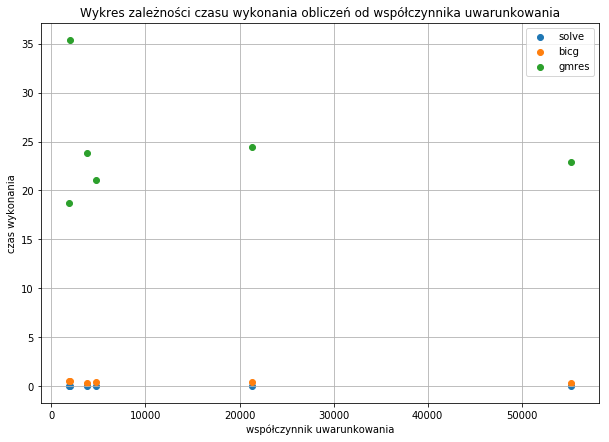

In [19]:
print("Metoda solve:")
time_solve = []
residuum_solve = []
for i in range(len(tau)):
    B = A[i]
    start = time.perf_counter()
    x = solve(B, b)
    duration = time.perf_counter() - start
    residuum_solve.append(b - B@x)
    print("czas: ", duration)
    time_solve.append(duration)
print()

print("Metoda bicg:")
time_bicg = []
residuum_bicg = []
for i in range(len(tau)):
    B = A[i]
    B = csr_matrix(B)
    start = time.perf_counter()
    x, info = bicg(B, b)
    duration = time.perf_counter() - start
    residuum_bicg.append(b - B@x)
    print("czas: ", duration)
    time_bicg.append(duration)
print()

print("Metoda gmres:")
time_gmres = []
residuum_gmres = []
for i in range(len(tau)):
    B = A[i]
    B = csr_matrix(B)
    start = time.perf_counter()
    x, info = gmres(B, b)
    duration = time.perf_counter() - start
    residuum_gmres.append(b -B@x)
    print("czas: ", duration)
    time_gmres.append(duration)
print()

plt.figure(figsize=(10, 7))
plt.scatter(wsp_uwarunkowania, time_solve, label="solve")
plt.scatter(wsp_uwarunkowania, time_bicg, label="bicg")
plt.scatter(wsp_uwarunkowania, time_gmres, label="gmres")
plt.grid()
plt.title('Wykres zależności czasu wykonania obliczeń od współczynnika uwarunkowania')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('czas wykonania')
plt.legend()
plt.show()


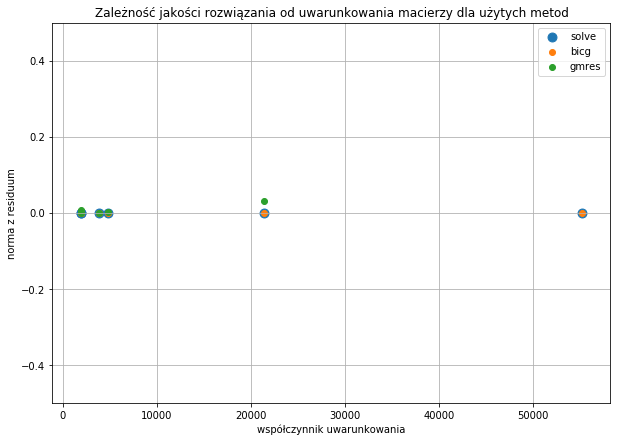

In [24]:
res_solve = []
res_bicg = []
res_gmres = []

for i in range(6):
    res_solve.append(norm(residuum_solve[i]))
    res_bicg.append(norm(residuum_bicg[i]))
    res_gmres.append(norm(residuum_gmres[i]))

    
plt.figure(figsize=(10, 7))
plt.scatter(wsp_uwarunkowania, res_solve, s=80, label="solve")
plt.scatter(wsp_uwarunkowania, res_bicg, label="bicg")
plt.scatter(wsp_uwarunkowania, res_gmres, label="gmres")
plt.title('Zależność jakości rozwiązania od uwarunkowania macierzy dla użytych metod')
plt.xlabel('współczynnik uwarunkowania')
plt.ylabel('norma z residuum')
plt.legend()
plt.grid()
plt.ylim(bottom=-0.5, top=0.5)
plt.show()

ZADANIE 5

In [11]:
def gaussSeidl(A, b, n, x):
    L = tril(A)
    U = A - L

    for i in range(n):
        x = dot(linalg.inv(L), b - dot(U, x))
    return x

n = 100

A = array([[11, 1], [9, 18]])
b = array([18, 4])
x = [0, 0]

G = gaussSeidl(A, b, n, x)
S = solve(A, b)
print(G, " - metoda Gaussa-Seidla")
print(S, " - metoda solve\n")

A = array([[1, 2, 3], [2, 1, 3], [3, 2, 1]])
b = transpose(array([1, 2, 0]))
x = [0, 0, 0]

G = gaussSeidl(A, b, n, x)
S = solve(A, b)

print(G, " - metoda Gaussa-Seidla")
print(S, " - metoda solve")

# Macierz podana w zadaniu nie spełnia warunków zbieżności, dlatego metoda Gaussa-Seidla zwraca niepoprawny wynik

[ 1.69312169 -0.62433862]  - metoda Gaussa-Seidla
[ 1.69312169 -0.62433862]  - metoda solve

[ -9.71400324e+60  -2.37837221e+62   5.04816453e+62]  - metoda Gaussa-Seidla
[ 0.25 -0.75  0.75]  - metoda solve
